In [32]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import plotly.graph_objects as go

C:\Users\gwd007\Documents\Exjobb\data\extracted\group1\N-B_Mid2_Comp.txt_N10, B, 0.11.csv


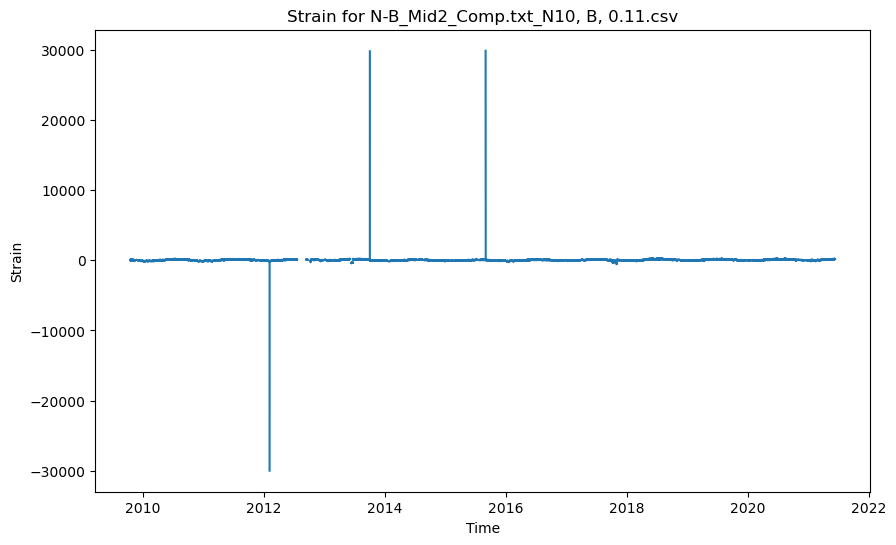

In [33]:
# Add the root project directory to the Python path
project_root = Path.cwd().parent  # This will get the project root since the notebook is in 'notebooks/'
sys.path.append(str(project_root))

from configs.path_config import EXTRACTED_DATA_DIR

base_dir = EXTRACTED_DATA_DIR
file = 'N-B_Mid2_Comp.txt_N10, B, 0.11.csv'
path = Path(base_dir) / 'group1' / file

print(path)

df = pd.read_csv(path, parse_dates=['Time'])

df_original = df.copy()

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Strain'], linestyle='-')
plt.xlabel('Time')
plt.ylabel('Strain')
plt.title(f'Strain for {file}')
plt.show()

In [34]:
from src.processing import preprocessing 

df_original = preprocessing.preprocessing_pipeline(df_original)

AttributeError: module 'src.processing.preprocessing' has no attribute 'preprocessing_pipeline'

In [ ]:
from src.processing import remove_outliers

df = remove_outliers.clean_zeros_outliers(df)

In [ ]:
#indentify the regions of missing values
from src.processing import nan_regions #nan_regions.py

threshold = 5 # Choose the threshold(s) for consecutive NaNs
consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold)

# for threshold in thresholds:

fig = go.Figure()

# Add strain data line
fig.add_trace(go.Scatter(x=df['Time'], y=df['Strain'], mode='lines', name='Strain Data'))

# Shade regions with more than x consecutive NaNs
for start, end in consecutive_nan_regions:
    fig.add_vrect(
        x0=df['Time'].loc[start], x1=df['Time'].loc[end],
        fillcolor='red', opacity=0.3, layer='below', line_width=0
    )

# Print NaN regions information
for column in nan_regions_sorted:
    print(f"Length: {column[4]}, Start Time: {column[2]}, End Time: {column[3]}")

# Figure layout
fig.update_layout(
    title=f'Regions of more than {threshold} consecutive NaNs',
    xaxis_title='Time',
    yaxis_title='Strain',
    legend=dict(x=0, y=1),
)

fig.show()


In [ ]:
from src.processing import shift_region 

n_points = 15
std_multiplier = 4.6
min_region_size = 5

df_diff = shift_region.shift_scale_diff(df, std_multiplier, n_points, n_points, min_region_size)

In [ ]:
from src.processing import interpolate_nan
from src.processing import nan_regions

interpolate_threshold = 5

# consecutive_nan_regions, nan_regions_sorted = nan_regions.find_nan_regions(df, threshold=1)

df_filled = interpolate_nan.interpolate(df, nan_regions_sorted, interpolate_threshold)

In [ ]:
fig = go.Figure()

# Add traces for the different data series
fig.add_trace(go.Scatter(x=df_filled['Time'], y=df_filled['Strain'], mode='lines', name='Original', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_original['Time'], y=df_original['Strain'], mode='lines', name='Original', line=dict(color='red', dash='dash')))


# Add labels
fig.update_layout(
    title=f'Strain for {file}',
    xaxis_title='Time',
    yaxis_title='Strain',
    template='plotly_white'
)


# Show the plot
fig.show()